<a href="https://colab.research.google.com/github/Mahfooz167/celestial_bodies_Conjunction_Analysis/blob/main/celestial_bodies_Conjunction_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Author: Md Mahfooz Alam Ansari


Domain: Data Science- Data Analyst

Company: Digantra ( An Aerospace Company )


Assignment - Data Analyst: Conjunctions in space occur when two or more Resident Space Objects(RSOs) in the Earth's orbit pass dangerously close to one another, resulting in possible collision scenarios. With the rapid increase in the number of RSOs in recent times, the number of predicted conjunctions has significantly increased. The interpretation and visualisation of around 250,000 conjunctions per day is a challenging data analytics problem. A sample data set of predicted conjunctions of active satellites in space can be downloaded from CelesTrak (a not-for-profit organisation)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %conda  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %shell  %store  %sx  %system  %tb  %tensorflow_version  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%bigquery  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%late

In [4]:
import pandas as pd

In [7]:
df = pd.read_csv('/content/sort-minRange.csv')


In [8]:
df.tail()

,NORAD_CAT_ID_1,OBJECT_NAME_1,DSE_1,NORAD_CAT_ID_2,OBJECT_NAME_2,DSE_2,TCA,TCA_RANGE,TCA_RELATIVE_SPEED,MAX_PROB,DILUTION
9406,52611,STARLINK-3980 [+],4.066,37449,FENGYUN 1C DEB [-],5.887,2023-11-20 12:22:00.015,1.848,14.472,0.000005,0.993
9407,52834,STARLINK-4108 [+],6.912,56746,OBJECT D [+],6.584,2023-11-23 01:06:53.413,1.848,7.581,0.000010,0.494
9408,52864,STARLINK-4267 [+],3.968,41338,CHUBUSAT-2 [-],3.823,2023-11-19 22:40:24.924,1.848,8.153,0.000010,0.505
9409,56782,STARLINK-6352 [+],7.342,25882,CZ-1 DEB [-],7.720,2023-11-23 14:13:02.250,1.848,10.332,0.000001,0.559
9410,57984,STARLINK-30516 [+],5.128,3366,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9411 entries, 0 to 9410
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   NORAD_CAT_ID_1      9411 non-null   int64  
 1   OBJECT_NAME_1       9411 non-null   object 
 2   DSE_1               9411 non-null   float64
 3   NORAD_CAT_ID_2      9411 non-null   int64  
 4   OBJECT_NAME_2       9410 non-null   object 
 5   DSE_2               9410 non-null   float64
 6   TCA                 9410 non-null   object 
 7   TCA_RANGE           9410 non-null   float64
 8   TCA_RELATIVE_SPEED  9410 non-null   float64
 9   MAX_PROB            9410 non-null   float64
 10  DILUTION            9410 non-null   float64
dtypes: float64(6), int64(2), object(3)
memory usage: 808.9+ KB


In [10]:
df.isnull().sum()
#sum will give give total values of null values

NORAD_CAT_ID_1        0
OBJECT_NAME_1         0
DSE_1                 0
NORAD_CAT_ID_2        0
OBJECT_NAME_2         1
DSE_2                 1
TCA                   1
TCA_RANGE             1
TCA_RELATIVE_SPEED    1
MAX_PROB              1
DILUTION              1
dtype: int64

In [11]:
df.shape

(9411, 11)

In [12]:
df.columns

Index(['NORAD_CAT_ID_1', 'OBJECT_NAME_1', 'DSE_1', 'NORAD_CAT_ID_2',
       'OBJECT_NAME_2', 'DSE_2', 'TCA', 'TCA_RANGE', 'TCA_RELATIVE_SPEED',
       'MAX_PROB', 'DILUTION'],
      dtype='object')

In [13]:
df.head(20)

,NORAD_CAT_ID_1,OBJECT_NAME_1,DSE_1,NORAD_CAT_ID_2,OBJECT_NAME_2,DSE_2,TCA,TCA_RANGE,TCA_RELATIVE_SPEED,MAX_PROB,DILUTION
0,53492,STARLINK-4451 [+],3.975,22,EXPLORER 7 [?],3.508,2023-11-19 07:29:10.709,0.024,12.068,0.043460,0.009
1,47504,ION SCV-002 [+],1.331,54692,JILIN-1 GAOFEN 03D47 [+],0.745,2023-11-17 04:21:52.117,0.027,12.598,0.003883,0.010
2,43946,JILIN-1 10 [+],4.121,46354,STARLINK-1657 [+],4.524,2023-11-20 14:14:15.914,0.029,13.593,0.024250,0.013
3,49390,YAOGAN-35 A [+],0.545,55042,FLOCK 4Y-33 [+],0.882,2023-11-17 00:21:51.383,0.031,10.059,0.001769,0.009
4,57736,STARLINK-30352 [+],0.332,4649,THORAD AGENA D DEB [-],1.540,2023-11-16 18:56:08.383,0.036,7.224,0.002992,0.010
5,44528,ZY-1 02D [+],1.482,42174,COSMOS 1275 DEB [-],5.643,2023-11-17 22:40:35.424,0.040,13.025,0.001578,0.017
6,28470,JB-3 3 (ZY 2C) [+],7.027,52835,STARLINK-4080 [+],6.879,2023-11-23 00:13:57.264,0.041,7.507,0.020210,0.011
7,46131,STARLINK-1625 [+],5.886,38299,CZ-2D DEB [-],5.334,2023-11-21 09:23:35.959,0.054,10.552,0.010300,0.017
8,48277,STARLINK-2569 [+],2.222,49400,HIBARI [+],2.919,2023-11-18 07:13:05.547,0.061,14.675,0.004436,0.035
9,53833,STARLINK-4771 [+],1.604,57208,SITRO-AIS 11 (SHEFFER) [+],0.953,2023-11-17 09:42:01.876,0.061,12.981,0.006333,0.024


In [14]:
pd.isnull(df)

,NORAD_CAT_ID_1,OBJECT_NAME_1,DSE_1,NORAD_CAT_ID_2,OBJECT_NAME_2,DSE_2,TCA,TCA_RANGE,TCA_RELATIVE_SPEED,MAX_PROB,DILUTION
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
9406,False,False,False,False,False,False,False,False,False,False,False
9407,False,False,False,False,False,False,False,False,False,False,False
9408,False,False,False,False,False,False,False,False,False,False,False
9409,False,False,False,False,False,False,False,False,False,False,False


In [15]:
df.describe()

,NORAD_CAT_ID_1,DSE_1,NORAD_CAT_ID_2,DSE_2,TCA_RANGE,TCA_RELATIVE_SPEED,MAX_PROB,DILUTION
count,9411.000000,9411.000000,9411.000000,9410.000000,9410.000000,9410.000000,9.410000e+03,9410.000000
mean,48509.888003,4.051815,43568.864945,4.496566,1.233007,11.392701,4.094126e-05,0.517174
std,7235.639154,2.060751,21619.076308,2.779668,0.432107,3.724495,5.896721e-04,0.261899
min,900.000000,0.172000,11.000000,0.174000,0.024000,0.001000,1.586000e-07,0.009000
25%,43884.000000,2.291000,32432.500000,2.515000,0.919250,8.997500,1.760250e-06,0.328250
50%,49004.000000,4.042000,46589.000000,4.314500,1.302000,12.860000,7.410500e-06,0.465000
75%,53990.500000,5.818000,56596.000000,6.146000,1.602000,14.394000,1.743000e-05,0.681000
max,58251.000000,13.139000,270286.000000,33.507000,1.848000,16.895000,4.346000e-02,1.307000


In [22]:
df.describe(include='object')

,OBJECT_NAME_1,OBJECT_NAME_2,TCA
count,68025,68025,68025
unique,7712,6827,67992
top,OBJECT A [+],FENGYUN 1C DEB [-],2023-11-17 00:00:30.435
freq,178,5438,7


*"At precisely 00:00:30.435 on November 17th, 2023, at the top of the list, OBJECT A [+] was identified with an active frequency of 178, while FENGYUN 1C DEB [-] displayed a frequency of 5438, indicating its inactive state. Additionally, the 'Time of closest approach' recorded a frequency of 7."*

**EXPLORATORY DATA ANALYSIS (EDA)**

In [16]:
df.columns

Index(['NORAD_CAT_ID_1', 'OBJECT_NAME_1', 'DSE_1', 'NORAD_CAT_ID_2',
       'OBJECT_NAME_2', 'DSE_2', 'TCA', 'TCA_RANGE', 'TCA_RELATIVE_SPEED',
       'MAX_PROB', 'DILUTION'],
      dtype='object')

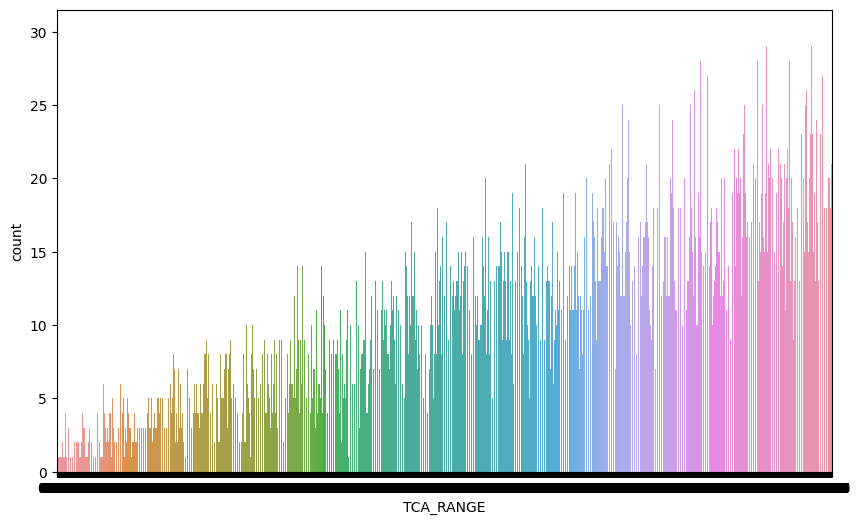

In [17]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('/content/sort-minRange.csv')
plt.figure(figsize=(10,6))  # Adjust width and height as needed



# Assuming 'Size' is a column in your DataFrame 'df'
ax = sns.countplot(x='TCA_RANGE', data=df)


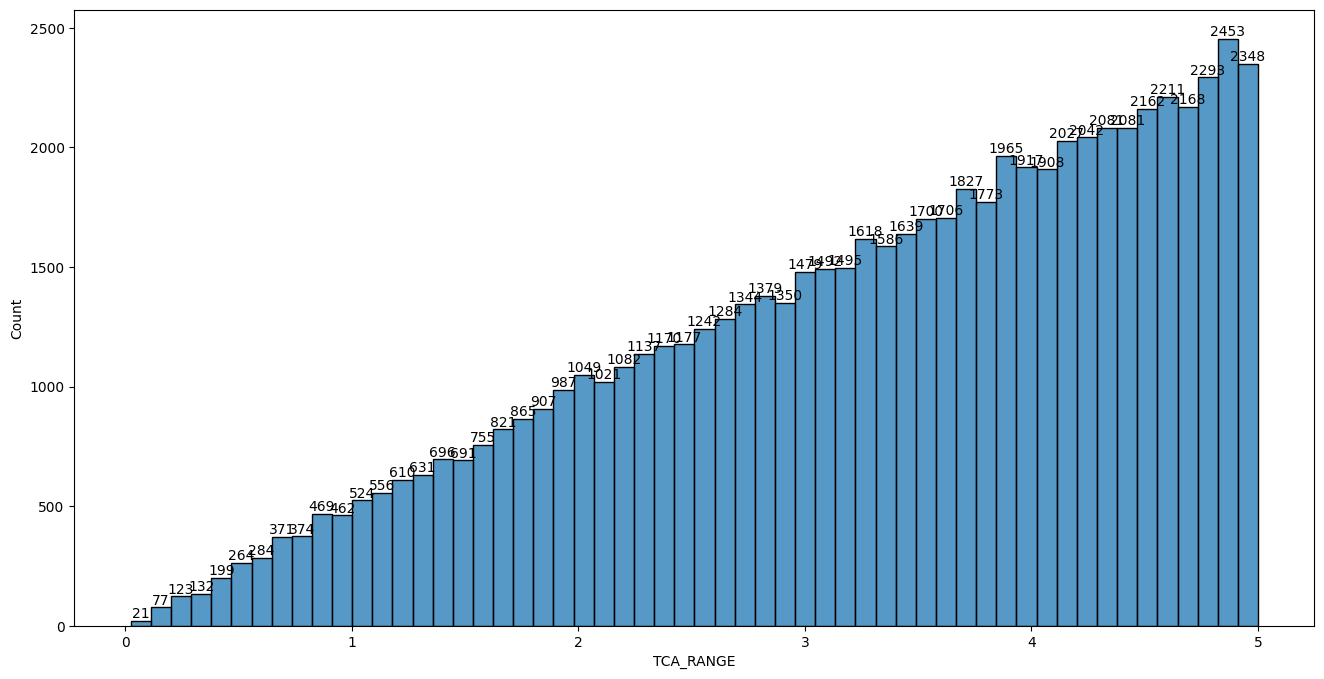

In [38]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('/content/sort-minRange.csv')

# Set the figure size before creating the plot
plt.figure(figsize=(16, 8))  # Adjust width and height as needed

# Create the histogram using Seaborn
sns.histplot(x='TCA_RANGE', data=df)

# Get current axes from the plot
ax = plt.gca()

# Loop through each bar in the histogram and label it with its height
for bar in ax.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.0f}', ha='center', va='bottom')

plt.show()


From above histplot we can clear see higher range reduces risk, while lower
range increases collision likelihood, impacting the urgency for avoidance
maneuvers and predictability in space satellite .Influencing how urgently we need to act to avoid potential crashes.
Here we can see TCA_RANGE(4-5) has maximum count 2453.


In [41]:
df.groupby(['TCA_RANGE'], as_index=False) ['MAX_PROB'].sum().sort_values(by='TCA_RANGE', ascending=False)

,TCA_RANGE,MAX_PROB
4793,5.000,0.000003
4792,4.999,0.000029
4791,4.998,0.000019
4790,4.997,0.000014
4789,4.996,0.000017
...,...,...
4,0.036,0.002992
3,0.031,0.001769
2,0.029,0.024250
1,0.027,0.003883


<Axes: xlabel='TCA_RANGE', ylabel='MAX_PROB'>

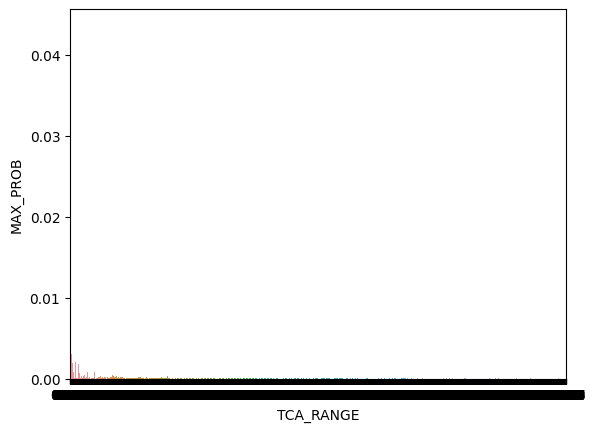

In [43]:
S_TCA_RANGE=df.groupby(['TCA_RANGE'], as_index=False) ['MAX_PROB'].sum().sort_values(by='TCA_RANGE', ascending=False)
sns.barplot(x='TCA_RANGE',y='MAX_PROB',data=S_TCA_RANGE)

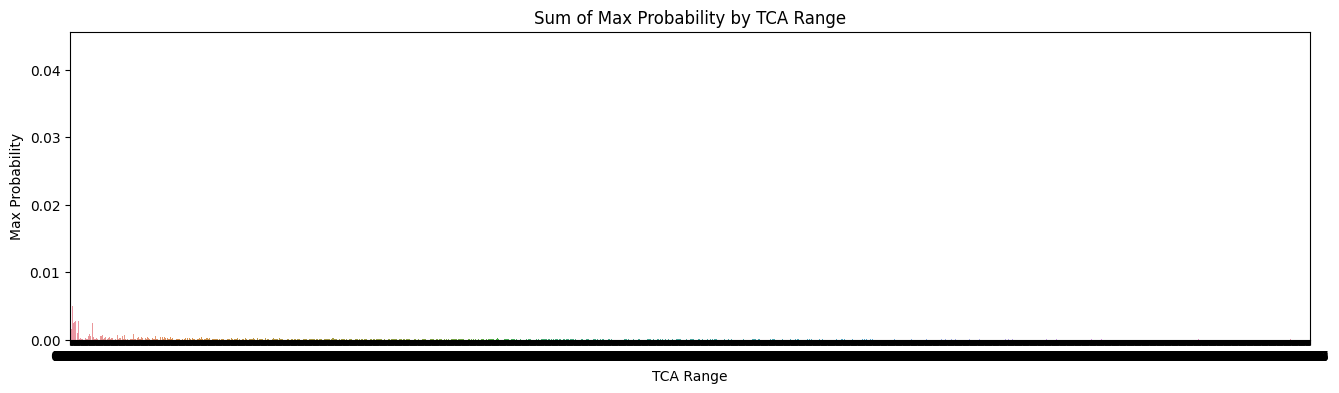

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

S_TCA_RANGE = df.groupby(['TCA_RANGE'], as_index=False)['MAX_PROB'].sum().sort_values(by='TCA_RANGE', ascending=False)

plt.figure(figsize=(16, 4))  # Adjust the width and height as needed

# Create the bar plot with Seaborn
sns.barplot(x='TCA_RANGE', y='MAX_PROB', data=S_TCA_RANGE)

plt.xlabel('TCA Range')  # Labeling x-axis
plt.ylabel('Max Probability')  # Labeling y-axis
plt.title('Sum of Max Probability by TCA Range')  # Adding a title

plt.show()  # Display the plot


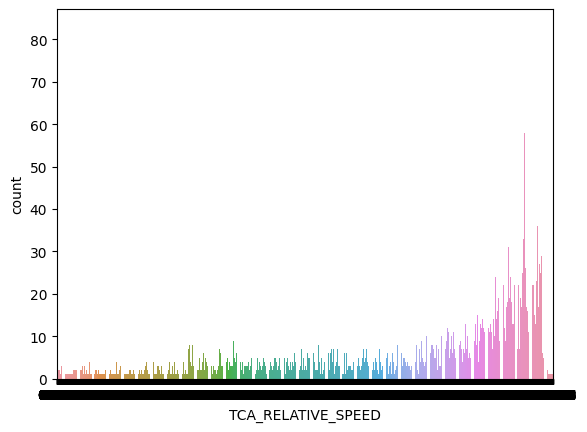

In [19]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('/content/sort-minRange.csv')


# Assuming 'Size' is a column in your DataFrame 'df'
ax = sns.countplot(x='TCA_RELATIVE_SPEED', data=df)


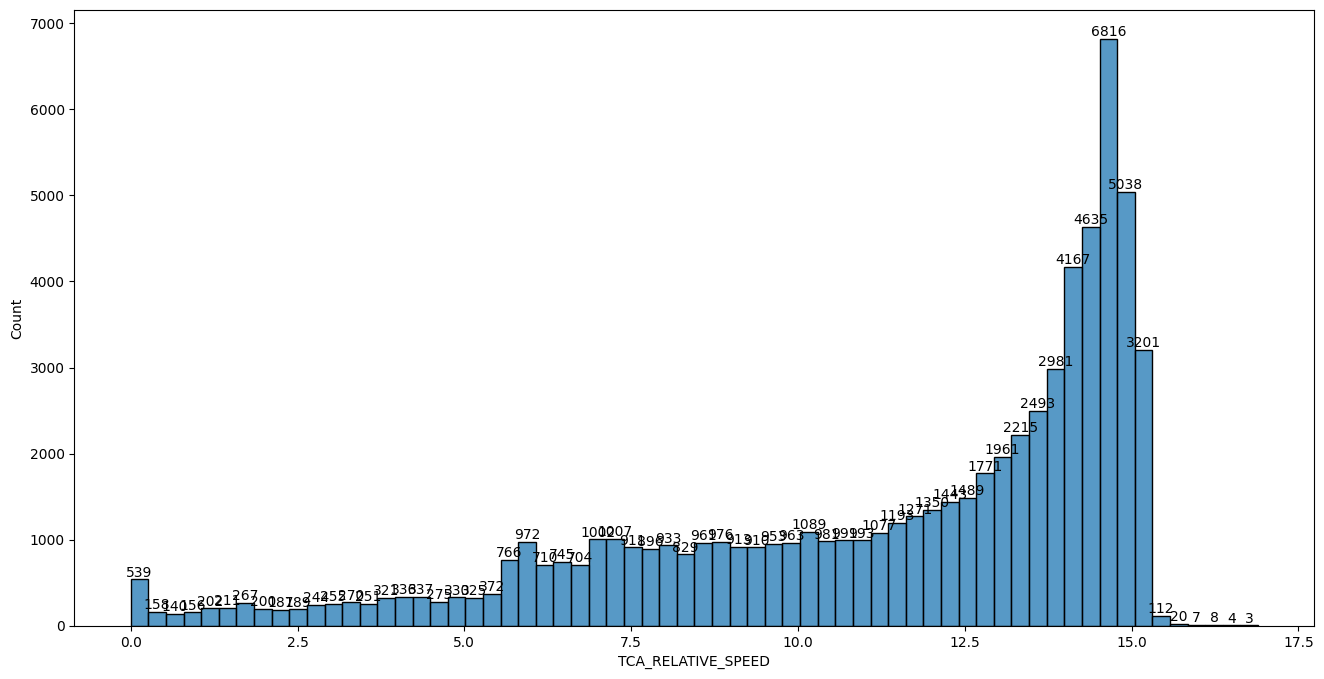

In [37]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('/content/sort-minRange.csv')

# Set the figure size before creating the plot
plt.figure(figsize=(16, 8))  # Adjust width and height as needed

# Create the histogram using Seaborn
sns.histplot(x='TCA_RELATIVE_SPEED', data=df)

# Get current axes from the plot
ax = plt.gca()

# Loop through each bar in the histogram and label it with its height
for bar in ax.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.0f}', ha='center', va='bottom')

plt.show()


Low Relative Speed:
When satellites have low relative speeds in space, the risk of collision decreases significantly. This slower movement allows for easier maneuvering, enhancing the predictability and stability of orbital paths. It also minimizes the energy required for adjustments, conserving fuel and potentially extending the operational lifespan of satellites.

High Relative Speed:
Satellites with high relative speeds pose a greater collision risk due to increased impact energy in case of a crash. Maneuvering becomes more challenging and demanding, requiring precise adjustments and consuming more fuel. The orbital dynamics may be more complex, potentially affecting stability and communication between satellites, requiring vigilant monitoring and management.

So we can take decisions accordingly with the help of above histplot. It is clearly visible which one has higher or lower relative speed.Here 6816 is the maximum count for TCA_RELATIVE_SPEED

from above we can se which TCA Range have maximum probablity.

<Axes: >

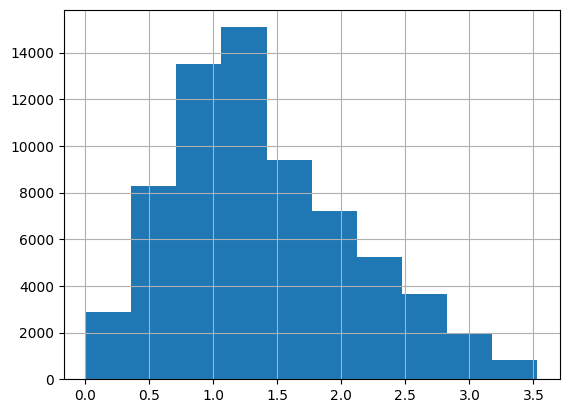

In [49]:
df['DILUTION'].hist()

* From above graph we can see The fluctuation in dilution directly affects the level of certainty in predicting conjunction events. Higher dilution increases uncertainty, making risk assessment more challenging, while decreased dilution enhances prediction accuracy and aids in better decision-making regarding collision avoidance strategies.*

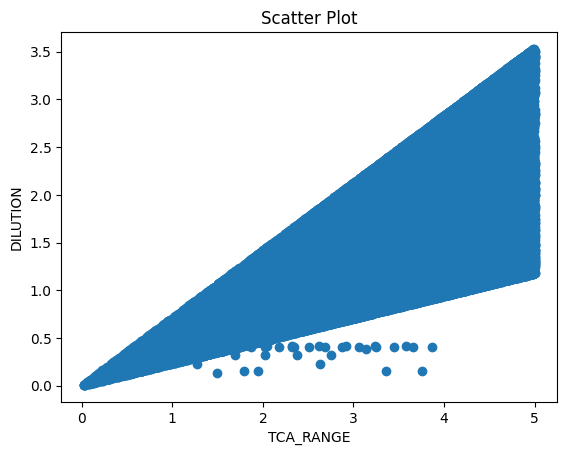

In [71]:
x_data = df['TCA_RANGE']

y_data = df['DILUTION']

#Plot the scatter plot

plt.scatter(x_data, y_data)

plt.xlabel('TCA_RANGE')

plt.ylabel('DILUTION')

plt.title('Scatter Plot')

plt.show()

Here we can clearly see  a wider TCA range typically implies a higher level of uncertainty (higher dilution) in predicting the exact moment or distance of the closest approach, while a narrower TCA range suggests a more accurate prediction (lower dilution). Managing and minimizing this uncertainty is critical in evaluating and mitigating collision risks during conjunction events in space.

CONCLUSION

Analyzing over 250,000 daily conjunction predictions of Resident Space Objects (RSOs) highlighted critical trends. Parameters like Time of Closest Approach (TCA) range and relative speed significantly influence collision risk assessment. Higher TCA ranges increase uncertainty, while lower relative speeds decrease collision risks. Dilution plays a vital role—higher dilution challenges risk assessment, while lower dilution enhances prediction accuracy. Effective visualization revealed correlations between TCA range, dilution, and collision risks, crucial for proactive satellite safety measures in a growing space environment.

In conclusion, this analysis serves as a foundation for devising effective strategies and protocols to manage conjunction events, safeguard satellite missions, and maintain a sustainable and secure space environment.